# 1. Project Title: 
## Multiple Class Classification on STEM Level and Salary Dataset

### Name and student ID: 
- `Khusroo Kalim Ansari : 300347313`

### References:
- Dataset 
    - https://www.kaggle.com/datasets/jackogozaly/data-science-and-stem-salaries
- Career Levels Mapping 
    - https://www.levels.fyi/?compare=Facebook,Google,Amazon&track=Software%20Engineer
- ROC & Precision-Recall 
    - https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
- ROC Multiple Class 
    - https://towardsdatascience.com/multiclass-classification-evaluation-with-roc-curves-and-roc-auc-294fd4617e3a
- ROC Multiple Class 
    - https://stackoverflow.com/questions/51378105/plot-multi-class-roc-curve-for-decisiontreeclassifier
- ROC Multiple Class 
    - https://stackoverflow.com/questions/45332410/roc-for-multiclass-classification
- KNN Tuning 
    - https://medium.datadriveninvestor.com/k-nearest-neighbors-in-python-hyperparameters-tuning-716734bc557f
- Oversampling 
    - https://towardsdatascience.com/5-smote-techniques-for-oversampling-your-imbalance-data-b8155bdbe2b5
- Scaling & Oversampling 
    - https://stats.stackexchange.com/questions/363312/normalization-standardization-should-one-do-this-before-oversampling-undersampl
- Improve Accuracy 
    - https://analyticsindiamag.com/how-to-improve-the-accuracy-of-a-classification-model/
- Random Forest Tuning 
    - https://www.analyticsvidhya.com/blog/2015/06/tuning-random-forest-model/
- Decision Tree Tuning 
    - https://towardsdatascience.com/how-to-tune-a-decision-tree-f03721801680
- SelectKBest 
    - https://www.datatechnotes.com/2021/02/seleckbest-feature-selection-example-in-python.html
- OneVsRest & OneVsOne 
    - https://machinelearningmastery.com/one-vs-rest-and-one-vs-one-for-multi-class-classification/
- Feature Selection 
    - https://machinelearningmastery.com/feature-selection-with-categorical-data/
- Feature Selection 
    - https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/
- SMOTE 
    - https://stackoverflow.com/questions/47655813/oversampling-smote-for-binary-and-categorical-data-in-python
- SMOTENC 
    - https://medium.com/analytics-vidhya/smote-nc-in-ml-categorization-models-fo-imbalanced-datasets-8adbdcf08c25
- SMOTENC 
    - https://imbalanced-learn.org/dev/references/generated/imblearn.over_sampling.SMOTENC.html
- Multiple Class Classification 
    - https://www.projectpro.io/article/multi-class-classification-python-example/547
- Multiple Class Classification 
    - https://www.geeksforgeeks.org/multiclass-classification-using-scikit-learn/
- Multiple Class Classification 
    - https://machinelearningmastery.com/multi-class-imbalanced-classification/
- Multple Class Classification 
    - https://www.projectpro.io/article/multi-class-classification-python-example/547#mcetoc_1fpjsn4g8d
    
    
### Objective
The dataset consists of more than 62642 salaries records of companies in data science and STEM industries. With records of 1631 companies, those with the top 3 number of records (i.e. Amazon, Google and Facebook) are chosen for further analysis on predicting career levels based on other variables. Although Microsoft has the second largest dataset, it is excluded from the analysis as its career levels are dissimilar to the others. 

In this report, we will first align the career levels of Amazon, Google and Facebook. SelectKBest will be used for feature selection and smaller classes in levels will be oversampled with SMOTENC for a more balanced dataset. To compare prediction accuracy on levels, different classification models, namely Naive Bayes, KNN, Decision Tree, Random Forest, AdaBoost and XGBoost, will be implemented with Standard, MinMax and Robust Scalers using Pipeline with cross-validation on training set only. After selecting the best model with the highest accuracy score, we will assess the results and perform out of sample predictions to simulate the model performance in the real world.

## 2. Library Import and Data Loading
### 2a. Import libraries

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, classification_report, accuracy_score
from sklearn.feature_selection import VarianceThreshold, SelectFromModel, RFE, SelectKBest, mutual_info_classif
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, label_binarize
from sklearn.compose import ColumnTransformer
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,  AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score
import statsmodels.api as sm
#!pip install imblearn
from imblearn.over_sampling import SMOTENC
from itertools import cycle
from collections import Counter
from sklearn.multiclass import OneVsRestClassifier
from numpy import random

### 2b. Load data

In [2]:
# Loading unclean data
df = pd.read_csv("Levels_Fyi_Salary_Data.csv")
print("Unprocessed dataset has {} data points with {} variables".format(*df.shape))
print(df)

Unprocessed dataset has 62642 data points with 29 variables
                timestamp     company     level                         title  \
0       6/7/2017 11:33:27      Oracle        L3               Product Manager   
1      6/10/2017 17:11:29        eBay      SE 2             Software Engineer   
2      6/11/2017 14:53:57      Amazon        L7               Product Manager   
3       6/17/2017 0:23:14       Apple        M1  Software Engineering Manager   
4      6/20/2017 10:58:51   Microsoft        60             Software Engineer   
...                   ...         ...       ...                           ...   
62637   9/9/2018 11:52:32      Google        T4             Software Engineer   
62638   9/13/2018 8:23:32   Microsoft        62             Software Engineer   
62639  9/13/2018 14:35:59        MSFT        63             Software Engineer   
62640  9/16/2018 16:10:35  Salesforce  Lead MTS             Software Engineer   
62641   1/29/2019 5:12:59       apple      ict3  

### 2c. Overview of dataset

In [3]:
# checking the number of companies in dataset
df['company'].nunique()

1631

In [4]:
# sorting companies by number of records in level
company_table = df[['company','level']].groupby('company').count()
company_table = pd.DataFrame(company_table)
company_table = company_table.sort_values(['level'], ascending=False)
company_table.head(10)

,level
company,
Amazon,8126
Microsoft,5216
Google,4330
Facebook,2990
Apple,2027
Oracle,1128
Salesforce,1056
Intel,949
IBM,907


## 3. Data Wrangling and Transformation

### 3a. Handling unneeded columns

In [5]:
# Drop columns that are not necessary for analysis
drop_list = ['title', 'location', 'tag', 'otherdetails', 'dmaid', 'rowNumber',
             'Race_Asian', 'Race_White', 'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic',
             'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree', 'Highschool', 'Some_College']
df.drop(drop_list, axis=1, inplace=True)

In [6]:
# Filling NaN in gender, race, education columns
df['gender'] = df['gender'].fillna(value='unknown')
df['Race'] = df['Race'].fillna(value='unknown')
df['Education'] = df['Education'].fillna(value='unknown')

### 3b. Handling date column

In [7]:
# Convert timestamp into month and year format
from datetime import datetime as dt

df['timestamp'] = pd.to_datetime(df['timestamp'])
df['timestamp'] = pd.DatetimeIndex(df['timestamp']).year

### 3c. Selecting subset of dataframe

In [8]:
# Seperate the data by Amazon, Facebook and Google data for further data wrangling
df_Amazon = df[df['company'] == 'Amazon']
df_Facebook = df[df['company'] == 'Facebook']
df_Google = df[df['company'] == 'Google']

print("Amazon dataset has {} data points with {} variables:".format(*df_Amazon.shape))
print(df_Amazon.head(),'\n\n')
print("Facebook dataset has {} data points with {} variables:".format(*df_Facebook.shape))
print(df_Facebook.head(),'\n\n')
print("Google dataset has {} data points with {} variables:".format(*df_Google.shape))
print(df_Google.head())

Amazon dataset has 8126 data points with 13 variables:
    timestamp company level  totalyearlycompensation  yearsofexperience  \
2        2017  Amazon    L7                   310000                8.0   
14       2017  Amazon    L6                   287000               12.0   
15       2017  Amazon    L5                   218000               10.0   
22       2017  Amazon    L6                   300000               12.0   
23       2017  Amazon    L7                   430000               12.0   

    yearsatcompany  basesalary  stockgrantvalue    bonus   gender  cityid  \
2              0.0    155000.0              0.0      0.0  unknown   11527   
14             1.0    160000.0              0.0      0.0  unknown   11527   
15             0.0    150000.0           7000.0  61000.0  unknown   11527   
22            12.0    158000.0         142000.0      0.0  unknown   11527   
23            12.0    220000.0         210000.0      0.0  unknown   11527   

       Race Education  
2   unk

### 3d. Renaming data in level column

In [9]:
# Transforming data column 'level' into matching coding scheme that will be used as predicting variable

df_Amazon['level'] = df_Amazon['level'].replace(dict.fromkeys(['4','L 4','L4(SDE 1)','SDE I','SDE Newgrad','SDE 1','SDEI','SysDE1'], 'L4'))
df_Amazon['level'] = df_Amazon['level'].replace(dict.fromkeys(['5','L5 / SDE2','L5 QAE','L5 SDM','L5 security','L5`','Level 5','lv5','SDE 2','SDE II','Sde2','SDEII','Senior Product Manager','Sr Product Manager'], 'L5'))
df_Amazon['level'] = df_Amazon['level'].replace(dict.fromkeys(['6','6.5','L6 - SDE3 - Senior Engineer','L6 Manager','L6 PM','L6 PMT-ES','L6 QAM','L6 SDE3','L6 SDM','L6 TPM','L6.5','L6M','level 6','SDE 3','SDE III','SDE III (L6)','SDE3(L6)','SDEIII','Senior SDE'], 'L6'))
df_Amazon['level'] = df_Amazon['level'].replace(dict.fromkeys(['7','L7 (Sr Manager)','L7 Principal','Principal SDE','Senior SDM','Senior Software Engineering Manager','Software Dev Manager'], 'L7'))
df_Amazon['level'] = df_Amazon['level'].replace(dict.fromkeys(['8','L8 Director','Senior'], 'L8'))
df_Amazon['level'] = np.where(df_Amazon['level'].isin(['L4','L5','L6','L7','L8','L10']), df_Amazon['level'], 'Others')

df_Facebook['level'] = df_Facebook['level'].replace(dict.fromkeys(['3','IC3','L3','T3','Rotational Product Manager (RPM)'], 'E3'))
df_Facebook['level'] = df_Facebook['level'].replace(dict.fromkeys(['4','E4 (Rotational Engineer)','E4 Software Engineer','IC4','L4','L4 Product Designer','L4 Product Manager','L4 Project Manager','L4 Software','L4 Sourcer','SE4','Rotational Software Engineer'], 'E4'))
df_Facebook['level'] = df_Facebook['level'].replace(dict.fromkeys(['5','Ic5','L5','L5 Marketing','L5 Mexhanical Engineer','L5 PMM','L5 Product Growth Analyst','L5 Product Manager','L5 Program Manager','M0','T5','Senior Engineer','6','IC 6','IC6','L6','L6 PM','L6 Product Manager','M1'], 'E5+E6'))
df_Facebook['level'] = df_Facebook['level'].replace(dict.fromkeys(['IC7','L7','L7 Product Manager','L7 sales','M2','Senior Engineering Manager'], 'E7'))
df_Facebook['level'] = df_Facebook['level'].replace(dict.fromkeys(['L8 Director Product Management'], 'E8'))
df_Facebook['level'] = df_Facebook['level'].replace(dict.fromkeys(['D1','D2','Director','Senior Director'], 'E9'))
df_Facebook['level'] = np.where(df_Facebook['level'].isin(['E3','E4','E5+E6','E7','E8','E9']), df_Facebook['level'], 'Others')

df_Google['level'] = df_Google['level'].replace(dict.fromkeys(['T3','L2','3','E3','New Grad L3','Senior SWE','SWE II','O5','I3','2','L3 software engineer','L1','Senior Sales Executive','new grad','L3 New Grad','APM1','Software Engineer','Account executive','junior'], 'L3'))
df_Google['level'] = df_Google['level'].replace(dict.fromkeys(['T4','4','E4','Product Manager 2','Associate Product Manager 1','SWE III','PM1','PM 1','Product Manager 1','Senior Director','L4P','Sr','Engineering Resident','Senior Designer'], 'L4'))
df_Google['level'] = df_Google['level'].replace(dict.fromkeys(['L6','L5','T6','T5','T6','T5','5','Senior','6','L6 (Staff)','Manager (L6)','Staff SWE','SWE L5','PM3','PM 3','PM2 (L5)','PM 2','IC4','Staff Designer','Manager','Middle'], 'L5+L6'))
df_Google['level'] = df_Google['level'].replace(dict.fromkeys(['T7','7','Group Product Manager','Staff','Senior Staff SWE','L7.5','7.5','Product Manager 3','Director of Product','s7'], 'L7'))
df_Google['level'] = df_Google['level'].replace(dict.fromkeys(['8','Principal Engineer'], 'L8'))
df_Google['level'] = df_Google['level'].replace(dict.fromkeys(['L9','L10'], 'L9+L10'))
df_Google['level'] = np.where(df_Google['level'].isin(['L3','L4','L5+L6','L7','L8','L9+L10']), df_Google['level'], 'Others')

# map levels in Facebook
map_Facebook = {
    'E3': 'L4',
    'E4': 'L5',
    'E5+E6': 'L6',
    'E7': 'L7',
    'E8': 'L8',
    'E9': 'L10',
    'Others': 'Others'
}
df_Facebook['level'] = df_Facebook['level'].map(map_Facebook)

# map levels in Google
map_Google = {
    'L3': 'L4',
    'L4': 'L5',
    'L5+L6': 'L6',
    'L7': 'L7',
    'L8': 'L8',
    'L9+L10': 'L10',
    'Others': 'Others'
}
df_Google['level'] = df_Google['level'].map(map_Google)

# combine Amazon, Facebook, Google datasets
datasets = [df_Amazon, df_Facebook, df_Google]
merged_df = pd.concat(datasets)

C:\Users\fawnf\AppData\Local\Temp\ipykernel_3124\1046434633.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Amazon['level'] = df_Amazon['level'].replace(dict.fromkeys(['4','L 4','L4(SDE 1)','SDE I','SDE Newgrad','SDE 1','SDEI','SysDE1'], 'L4'))
C:\Users\fawnf\AppData\Local\Temp\ipykernel_3124\1046434633.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Amazon['level'] = df_Amazon['level'].replace(dict.fromkeys(['5','L5 / SDE2','L5 QAE','L5 SDM','L5 security','L5`','Level 5','lv5','SDE 2','SDE II

C:\Users\fawnf\AppData\Local\Temp\ipykernel_3124\1046434633.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Google['level'] = df_Google['level'].replace(dict.fromkeys(['8','Principal Engineer'], 'L8'))
C:\Users\fawnf\AppData\Local\Temp\ipykernel_3124\1046434633.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Google['level'] = df_Google['level'].replace(dict.fromkeys(['L9','L10'], 'L9+L10'))
C:\Users\fawnf\AppData\Local\Temp\ipykernel_3124\1046434633.py:24: SettingWithCopyWarning: 
A value is

In [10]:
# Printing number of unique values in level column before renaming to class
print("Values in Merged_DF 'level' column before: ",merged_df['level'].unique(),"\n")

# Changing the predicting variable into class
merged_df['level'] = merged_df['level'].replace({'L4':'0', 'L5':'1', 'L6':'2',
                                                 'L7': '3', 'L8': '4', 'L10':'5', 'Others':'6'})

# Printing number of unique values in level column after renaming to class
print("Values in Merged_DF 'level' column after: ",merged_df['level'].unique(),"\n")

# Change the data type to integer
merged_df['level'] = merged_df['level'].astype(int)


Values in Merged_DF 'level' column before:  ['L7' 'L6' 'L5' 'L4' 'L8' 'Others' 'L10'] 

Values in Merged_DF 'level' column after:  ['3' '2' '1' '0' '4' '6' '5'] 



### 3e. Creating dummy variables for categorical features

In [11]:
# Reset index of merged dataframe before creating dummy variables
merged_df.reset_index(drop=True, inplace=True)

#Creating dummy for gender, race, and education; however, during the transformation, some options were favored, 
#which made it weird. For example, for gender, there was no female as the column was dropped.
#Reassigning the column and transform it through another variable to make the features make sense.

# split into dataframes for (a) directly creating dummy and (b) to drop specific column
merged_df_a = merged_df.drop(['gender', 'Race', 'Education'], axis=1)
merged_df_b = merged_df[["gender", "Race", "Education"]]

# create dummy variables directly for dataset a
merged_df_a_dummy = pd.get_dummies(merged_df_a, drop_first=True)

# create dummy variables for dataset b by specifying column to drop
merged_df_b_gender_dummy = merged_df_b['gender'].str.get_dummies().drop('unknown', axis=1)
merged_df_b_gender_dummy.rename(columns={'Female' : 'gender_Female', 'Male':'gender_Male', 'Other':'gender_Other'}, inplace=True)

merged_df_b_race_dummy = merged_df_b['Race'].str.get_dummies().drop('unknown', axis=1)
merged_df_b_race_dummy.rename(columns={'Asian' : 'race_Asian', 'Black':'race_Black', 'Hispanic':'race_Hispanic', 'Two Or More':'race_Two_Or_More', 'White':'race_White'}, inplace=True)

merged_df_b_education_dummy = merged_df_b['Education'].str.get_dummies().drop('unknown', axis=1)
merged_df_b_education_dummy.rename(columns={"Bachelor's Degree":'education_Bachelors_Degree', 'Highschool':'education_Highschool', "Master's Degree":'education_Masters_Degree', 'PhD':'education_PhD', 'Some College':'education_Some_College'}, inplace=True)

# combine datasets a and b
merged_df = pd.concat([merged_df_a_dummy,merged_df_b_gender_dummy,merged_df_b_race_dummy,merged_df_b_education_dummy], axis=1)
merged_df.columns = merged_df.columns.str.replace('-', '_')

# print dataset after creating dummy variables
print(merged_df.columns)
merged_df

Index(['timestamp', 'level', 'totalyearlycompensation', 'yearsofexperience',
       'yearsatcompany', 'basesalary', 'stockgrantvalue', 'bonus', 'cityid',
       'company_Facebook', 'company_Google', 'gender_Female', 'gender_Male',
       'gender_Other', 'race_Asian', 'race_Black', 'race_Hispanic',
       'race_Two_Or_More', 'race_White', 'education_Bachelors_Degree',
       'education_Highschool', 'education_Masters_Degree', 'education_PhD',
       'education_Some_College'],
      dtype='object')


,timestamp,level,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,cityid,company_Facebook,...,race_Asian,race_Black,race_Hispanic,race_Two_Or_More,race_White,education_Bachelors_Degree,education_Highschool,education_Masters_Degree,education_PhD,education_Some_College
0,2017,3,310000,8.0,0.0,155000.0,0.0,0.0,11527,0,...,0,0,0,0,0,0,0,0,0,0
1,2017,2,287000,12.0,1.0,160000.0,0.0,0.0,11527,0,...,0,0,0,0,0,0,0,0,0,0
2,2017,1,218000,10.0,0.0,150000.0,7000.0,61000.0,11527,0,...,0,0,0,0,0,0,0,0,0,0
3,2017,2,300000,12.0,12.0,158000.0,142000.0,0.0,11527,0,...,0,0,0,0,0,0,0,0,0,0
4,2017,3,430000,12.0,12.0,220000.0,210000.0,0.0,11527,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15441,2018,0,238000,2.0,0.0,131000.0,87500.0,19650.0,11527,0,...,0,0,0,0,0,0,0,0,0,0
15442,2018,0,220000,2.0,0.0,140000.0,40000.0,28000.0,7413,0,...,0,0,0,0,0,0,0,0,0,0
15443,2018,1,215000,2.0,2.0,132000.0,55000.0,23000.0,7322,0,...,0,0,0,0,0,0,0,0,0,0
15444,2018,0,169000,0.0,0.0,125000.0,25000.0,18750.0,7413,0,...,0,0,0,0,0,0,0,0,0,0


### 3f. Save cleaned data

In [12]:
#Saving the file
merged_df.to_csv('cleaned_data.csv', index=False)

## 4. Exploratory Data Analysis (EDA) and Visualization

### 4a. Summary of all variables in cleaned data

In [13]:
# basic statistic for the cleaned dataset
merged_df.describe()

,timestamp,level,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,cityid,company_Facebook,...,race_Asian,race_Black,race_Hispanic,race_Two_Or_More,race_White,education_Bachelors_Degree,education_Highschool,education_Masters_Degree,education_PhD,education_Some_College
count,15446.000000,15446.000000,1.544600e+04,15446.000000,15446.000000,15446.000000,1.544600e+04,15446.000000,15446.000000,15446.000000,...,15446.000000,15446.000000,15446.000000,15446.00000,15446.000000,15446.000000,15446.000000,15446.000000,15446.000000,15446.000000
mean,2019.946718,1.572834,2.657156e+05,7.130202,2.206647,140899.133886,8.612585e+04,23675.172796,9664.946070,0.193578,...,0.174803,0.010359,0.019552,0.01243,0.111485,0.167293,0.004856,0.241940,0.035867,0.004079
std,0.945150,1.621233,1.606140e+05,5.774855,2.585631,52904.387727,1.026681e+05,31725.918565,5031.067854,0.395114,...,0.379810,0.101252,0.138459,0.11080,0.314742,0.373249,0.069515,0.428272,0.185964,0.063737
min,2017.000000,0.000000,1.000000e+04,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1180.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2019.000000,1.000000,1.750000e+05,3.000000,0.000000,120000.000000,2.500000e+04,0.000000,7322.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2020.000000,1.000000,2.310000e+05,6.000000,1.000000,148000.000000,5.600000e+04,19000.000000,10182.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2021.000000,2.000000,3.140000e+05,10.000000,3.000000,165000.000000,1.100000e+05,30000.000000,11527.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2021.000000,6.000000,4.980000e+06,42.000000,20.000000,500000.000000,2.800000e+06,555000.000000,47926.000000,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 4b. Correlations between variables

In [14]:
# Display correlation in a dataframe
merged_df.corr()

,timestamp,level,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,cityid,company_Facebook,...,race_Asian,race_Black,race_Hispanic,race_Two_Or_More,race_White,education_Bachelors_Degree,education_Highschool,education_Masters_Degree,education_PhD,education_Some_College
timestamp,1.000000,0.028920,-0.007347,0.026605,0.010729,0.182872,0.041010,0.023714,0.024633,0.029875,...,0.345368,0.063275,0.083659,0.074952,0.246978,0.311763,0.053210,0.262021,0.081969,0.038001
level,0.028920,1.000000,0.483031,0.443527,0.204731,0.388746,0.426510,0.190179,-0.000248,0.439800,...,-0.035714,-0.008541,-0.012978,-0.007203,0.049686,-0.055660,0.006915,0.040780,0.065209,0.009343
totalyearlycompensation,-0.007347,0.483031,1.000000,0.500811,0.305745,0.594995,0.730463,0.437554,-0.081435,0.240418,...,-0.042248,-0.021274,-0.031770,-0.002519,0.016360,-0.084964,-0.017030,0.024955,0.093503,0.011346
yearsofexperience,0.026605,0.443527,0.500811,1.000000,0.406030,0.349489,0.449962,0.214901,0.009261,0.000112,...,-0.073194,-0.007733,-0.000755,-0.001518,0.075226,-0.062733,-0.002059,0.058312,-0.008991,0.039543
yearsatcompany,0.010729,0.204731,0.305745,0.406030,1.000000,0.164733,0.327089,-0.070798,0.012448,-0.146555,...,-0.013842,-0.031177,-0.016170,-0.010549,0.029449,-0.008921,-0.016029,-0.003353,0.001282,-0.005115
basesalary,0.182872,0.388746,0.594995,0.349489,0.164733,1.000000,0.583136,0.407930,-0.118648,0.255344,...,0.013940,-0.004241,-0.007668,0.012938,0.066933,-0.032462,-0.005148,0.117156,0.121083,0.025065
stockgrantvalue,0.041010,0.426510,0.730463,0.449962,0.327089,0.583136,1.000000,0.212921,-0.032354,0.206074,...,-0.021662,-0.032420,-0.025078,0.000204,0.034600,-0.046613,-0.012587,0.037360,0.087048,0.010786
bonus,0.023714,0.190179,0.437554,0.214901,-0.070798,0.407930,0.212921,1.000000,-0.059793,0.099555,...,-0.005953,0.014149,-0.000058,0.018831,0.018242,-0.026073,-0.003953,0.029539,0.081263,0.010901
cityid,0.024633,-0.000248,-0.081435,0.009261,0.012448,-0.118648,-0.032354,-0.059793,1.000000,-0.042512,...,0.040659,0.012169,-0.028449,-0.000715,-0.007121,0.040182,0.000605,-0.009265,-0.027037,-0.006019
company_Facebook,0.029875,0.439800,0.240418,0.000112,-0.146555,0.255344,0.206074,0.099555,-0.042512,1.000000,...,0.008344,-0.004811,0.011290,-0.000247,0.016483,0.003861,0.027065,0.000995,0.039439,0.014924


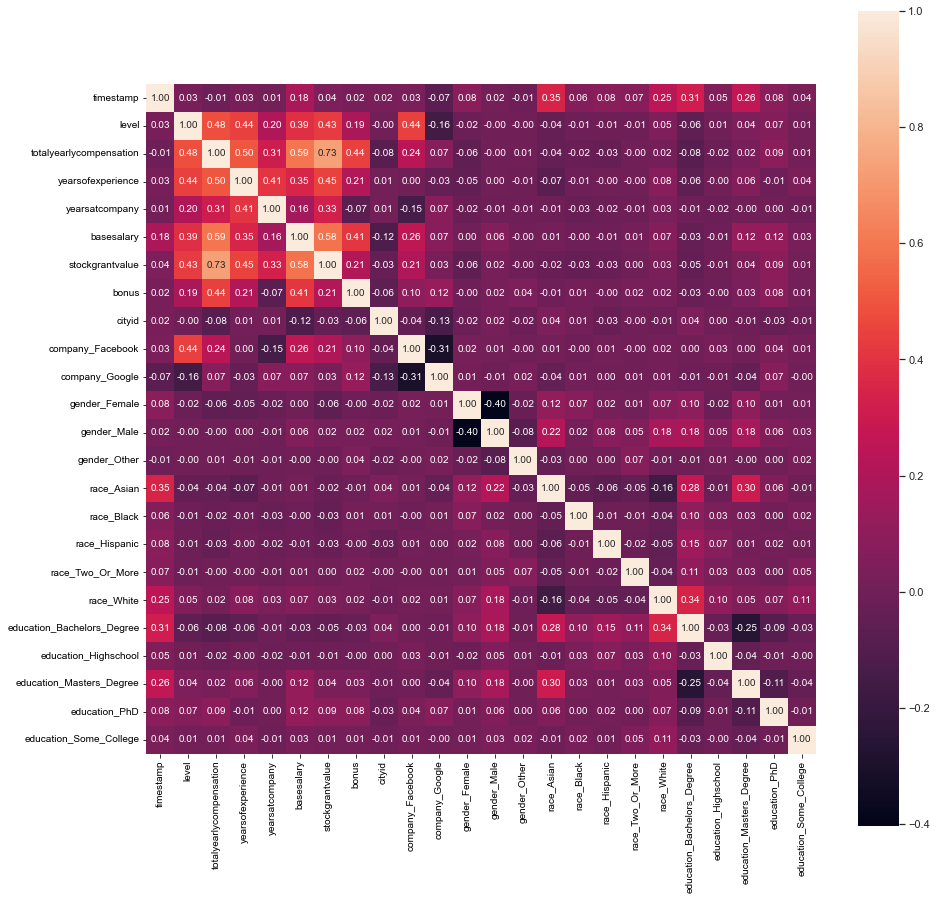

In [15]:
# Display correlation in a heatmap
cm = np.corrcoef(merged_df.values.T)
fig, ax = plt.subplots(figsize=(15,15))  
sns.set(font_scale=1)
hm = sns.heatmap(cm, 
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size':10},
                yticklabels=merged_df.columns,
                xticklabels=merged_df.columns)

### 4c. Data distribution in level column

In [16]:
# checking data distribution of level in Facebook and Google
level_table = merged_df[['level','company_Facebook', 'company_Google']].groupby('level').sum()

# summing up total data distribution of level 
level_table_total = merged_df[['level','company_Facebook']].groupby('level').count()
level_table_total.rename(columns={'company_Facebook':'total'}, inplace=True)
level_table = pd.concat([level_table,level_table_total],axis=1)

# calculating data distribution of level in Amazon
level_table['company_Amazon'] = level_table['total']-level_table['company_Facebook']-level_table['company_Google']

# rearrange columns and print result
level_table = level_table.reindex(columns=['company_Amazon', 'company_Facebook', 'company_Google', 'total'])
level_table = pd.DataFrame(level_table.astype(int))
level_table

,company_Amazon,company_Facebook,company_Google,total
level,,,,
0,2084,444,1279,3807
1,3115,828,1424,5367
2,2220,417,1404,4041
3,512,130,156,798
4,30,5,26,61
5,3,14,8,25
6,162,1152,33,1347


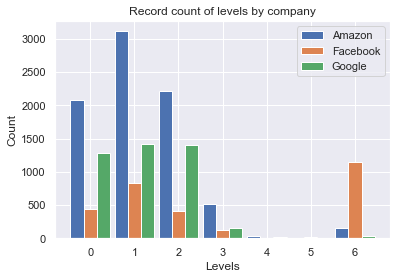

In [17]:
# bar chart to show data distribution in level column
level = ['0', '1', '2', '3', '4', '5', '6']

x_axis = np.arange(len(level))

# Multi bar Chart
plt.bar(x_axis -0.3, level_table['company_Amazon'], width=0.3, label = 'Amazon')
plt.bar(x_axis -0.0, level_table['company_Facebook'], width=0.3, label = 'Facebook')
plt.bar(x_axis +0.3, level_table['company_Google'], width=0.3, label = 'Google')

# Xticks
plt.xticks(x_axis, level)
# Add legend and labels
plt.legend()
plt.xlabel('Levels')
plt.ylabel('Count')
plt.title("Record count of levels by company")
# Display
plt.show()

### 4d. Distribution of categorical variables through Histogram

In [18]:
# function for histogram
def plot_hist(a, data, name):
    sns.histplot(data, ax=a)
    a.xaxis.grid(False)
    a.set(ylabel="Frequency")
    a.set(xlabel=name)
    a.set(title=f"{name} distribution")

#### 4d.1 By gender

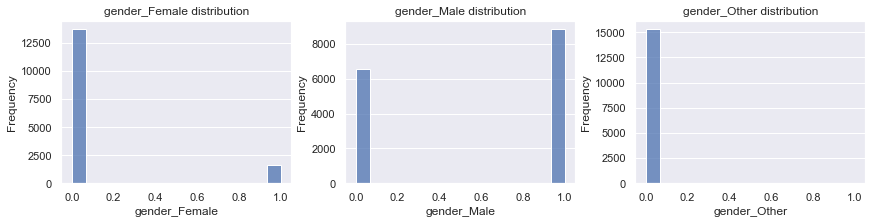

In [19]:
# histogram of data distribution in gender
fig, axs = plt.subplots(1, 3, figsize=(12, 3), constrained_layout=True)

column_ls =  ['gender_Female', 'gender_Male', 'gender_Other']

for ax, var_name in zip(axs.flat, column_ls):
    plot_hist(ax, merged_df[var_name], var_name)

#### 4d.2 By race

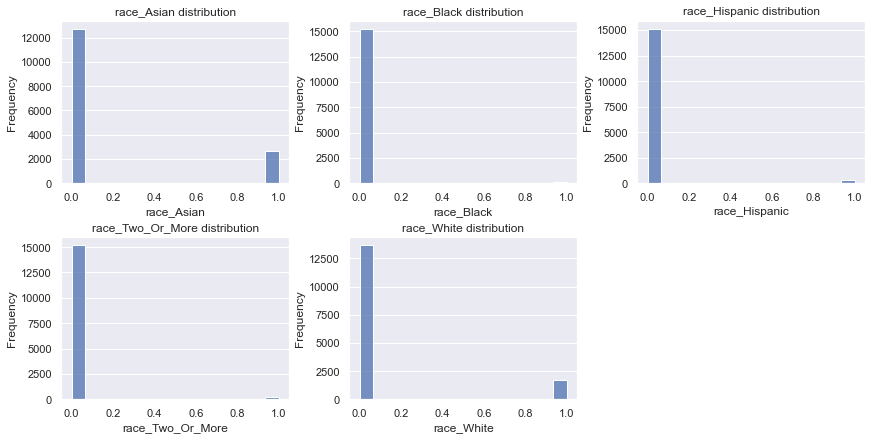

In [20]:
# histogram of data distribution in race
fig, axs = plt.subplots(2, 3, figsize=(12, 6), constrained_layout=True)
axs[1][2].set_visible(False)

column_ls =  ['race_Asian', 'race_Black', 'race_Hispanic', 'race_Two_Or_More', 'race_White']

for ax, var_name in zip(axs.flat, column_ls):
    plot_hist(ax, merged_df[var_name], var_name)

#### 4d.3 By education

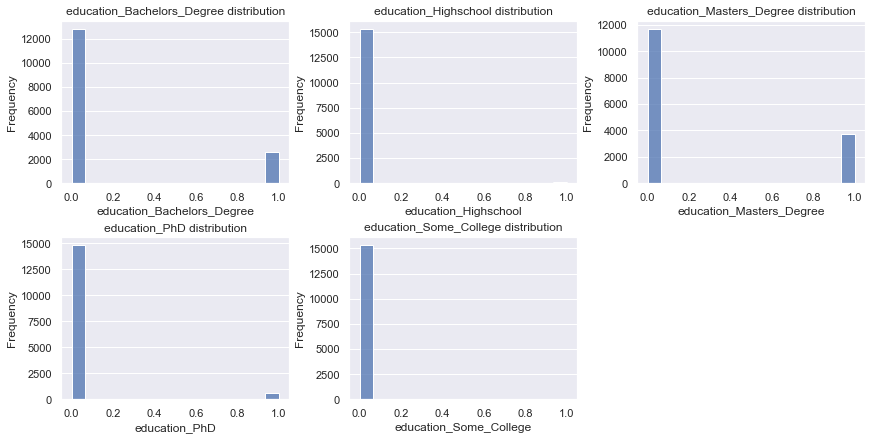

In [21]:
# histogram of data distribution in education
fig, axs = plt.subplots(2, 3, figsize=(12, 6), constrained_layout=True)
axs[1][2].set_visible(False)

column_ls =  ['education_Bachelors_Degree', 'education_Highschool', 'education_Masters_Degree', 
              'education_PhD', 'education_Some_College']

for ax, var_name in zip(axs.flat, column_ls):
    plot_hist(ax, merged_df[var_name], var_name)

### 4e. Scatterplot of continuous variables

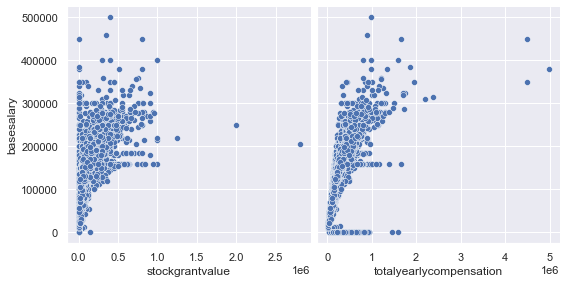

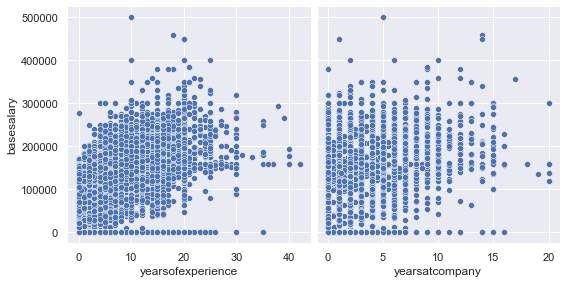

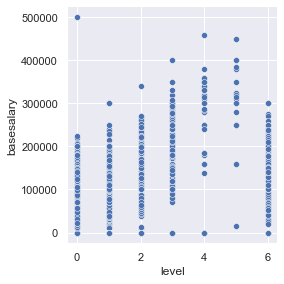

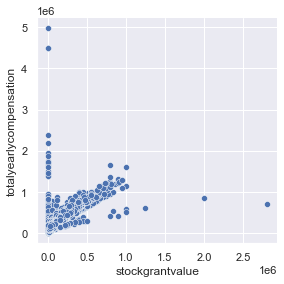

In [22]:
# scatterplot of salary against level, total yearly compensation, years of experience, and years at company
sns.pairplot(data=merged_df, x_vars=['stockgrantvalue', 'totalyearlycompensation'], y_vars=['basesalary'], height=4)
sns.pairplot(data=merged_df, x_vars=['yearsofexperience', 'yearsatcompany'], y_vars=['basesalary'], height=4)
sns.pairplot(data=merged_df, x_vars=['level'], y_vars=['basesalary'], height=4)
sns.pairplot(data=merged_df, x_vars=['stockgrantvalue'], y_vars=['totalyearlycompensation'], height=4)

plt.show()

### 4f. Summary of observation

- Overall

The dataset contains a total of 24 features with 4 main types of categorical data: company, gender, race and education. Due to data tranformation, the categorical data is separated into more detailed features.

- Correlation

Based on the correlation table and heatmap as illustrated in subsection 4b, it is observed that categorical variables (except company_Facebook) have weak relationship with level (-0.16 to 0.07). In general, continuous variables have moderate correlation with level and other continuous variables. The most notable correlations are between total yearly compensation and stock grant value(0.73), total yearly compensation and base salary(0.59), and base salary and stock grant value (0.58).

- Data distribution in level column

Based on the table and bar chart as illustrated in subsection 4c, it is observed that lower levels have significantly larger number of records. Level 0 to 2 in Amazon and Google contributed to more than 90% of records in respective companies. It suggests that we have to oversample the data in smaller classes in order to balance the data distribution.

- Data distribution in categorical variables

Based on the basic statistics and histogram as illustrated in subsection 4d, it is observed that categorical variables (gender, race and education) are not significant for our analysis. The majority of records are under “unknown”, which means the variables are not representative enough for prediction and no insight can be drawn from these variables.

- Data distribution in continuous variables

Based on the basic statistics and scatterplots as illustrated in subsection 4e, it is observed that there is positive relationship between base salary and the continuous variables (stock grant value, level, total yearly compensation and years of experience) except years at company. It makes sense that employees with higher career level probably have more stock grant value, compensation and experience, therefore getting higher salary. For the comparison on total yearly compensation versus stock grant value, as shown with high correlation in subsection 4b, it shows a positive linear relationship, which implies higher compensation has higher stock grant value.

In [23]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15446 entries, 0 to 15445
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   timestamp                   15446 non-null  int64  
 1   level                       15446 non-null  int32  
 2   totalyearlycompensation     15446 non-null  int64  
 3   yearsofexperience           15446 non-null  float64
 4   yearsatcompany              15446 non-null  float64
 5   basesalary                  15446 non-null  float64
 6   stockgrantvalue             15446 non-null  float64
 7   bonus                       15446 non-null  float64
 8   cityid                      15446 non-null  int64  
 9   company_Facebook            15446 non-null  uint8  
 10  company_Google              15446 non-null  uint8  
 11  gender_Female               15446 non-null  int64  
 12  gender_Male                 15446 non-null  int64  
 13  gender_Other                154

## 5. Feature Engineering

### 5a. Assign features

In [24]:
# Assigning the feature X and target y for further analysis
X = merged_df
X = X.drop('level', axis=1)
y = merged_df['level']

### 5b. Feature selection using SelectKBest

In [25]:
# Create and fit SelectKBest
select_k_best = SelectKBest(score_func=mutual_info_classif, k=9).fit(X, y)
select_k_best_features =X.iloc[:,select_k_best.get_support()]
print(select_k_best_features)

       totalyearlycompensation  yearsofexperience  yearsatcompany  basesalary  \
0                       310000                8.0             0.0    155000.0   
1                       287000               12.0             1.0    160000.0   
2                       218000               10.0             0.0    150000.0   
3                       300000               12.0            12.0    158000.0   
4                       430000               12.0            12.0    220000.0   
...                        ...                ...             ...         ...   
15441                   238000                2.0             0.0    131000.0   
15442                   220000                2.0             0.0    140000.0   
15443                   215000                2.0             2.0    132000.0   
15444                   169000                0.0             0.0    125000.0   
15445                   327000               10.0             1.0    155000.0   

       stockgrantvalue    b

## 6. Classification Model and Pipeline Implementation

### 6a. Classification Model Train

In [26]:
# divide the dataset into training and test sets with ratio 75:25
X_train, X_test, y_train, y_test = train_test_split(select_k_best_features, y, test_size=0.25,
                                                   random_state=42)

# OverSampling smaller classes in training set for a more balanced dataset
counter = Counter(y_train)
print('before smote: ', counter)

smotenc = SMOTENC(categorical_features=[7, 8], random_state=42)
X_resampled, y_resampled = smotenc.fit_resample(X_train, y_train)

counter = Counter(y_resampled)
print('\nafter smote: ', counter, '\n')


# Creating scaler, so can reapply for prediction
ss = StandardScaler()
mm = MinMaxScaler()
rb = RobustScaler()

# Use pipeline to implement classifier models with cross-validation on training set only
scalers = [ss, mm, rb]

names = ["Naive Bayes", "KNN", "Decision Tree",  "Random Forest", 
         "AdaBoost", "XGBoost"]

scalerClf = ["Naive Bayes - Standard Scaler", "Naive Bayes - MinMax Scaler", "Naive Bayes - Robust Scaler",
            "KNN - Standard Scaler", "KNN - MinMax Scaler", "KNN - Robust Scaler",
            "Decision Tree - Standard Scaler", "Decision Tree - MinMax Scaler", "Decision Tree - Robust Scaler",
            "Random Forest - Standard Scaler", "Random Forest - MinMax Scaler", "Random Forest - Robust Scaler",
            "AdaBoost - Standard Scaler", "AdaBoost - MinMax Scaler", "AdaBoost - Robust Scaler",
            "XGBoost - Standard Scaler", "XGBoost - MinMax Scaler", "XGBoost - Robust Scaler",]

scores = [] #list variable to hold scores (predictive accuracy scores)

classifiers = [
    GaussianNB(),
    KNeighborsClassifier(3),
    DecisionTreeClassifier(max_depth = 5),   
    RandomForestClassifier(max_depth = 5, n_estimators=100),
    AdaBoostClassifier(),
    XGBClassifier(use_label_encoder=False, eval_metric='error')]

# Cross Validation
kfold = KFold(n_splits=10)

# run classification models using Pipeline
for classifier in classifiers:
     for scaler in scalers:
        pipeline = Pipeline(steps=[
                            ('scaler', scaler),
                          ('classifier', classifier)])
        pipeline.fit(X_resampled, y_resampled) 

        cv_score = cross_val_score(pipeline, X_resampled, y_resampled, cv=kfold)
        print(scaler, classifier)
        print("\nTrain set accuracy:", pipeline.score(X_resampled, y_resampled))
        print("\nTest set accuracy:", pipeline.score(X_test, y_test))
        print("\nCross-validation scores:{}".format(cv_score))
        print("\nAverage accuracy", cv_score.mean())
        scores.append(pipeline.score(X_test, y_test))
        print("-------------------------------------------------------------------------------")

#Create a dataframe for prediction scores
scores_df = pd.DataFrame(zip(scalerClf, scores), columns=['Classifier', 'Accuracy Score'])
print("Overview of Classification Performance")
print(scores_df)

before smote:  Counter({1: 4031, 2: 3041, 0: 2875, 6: 981, 3: 589, 4: 48, 5: 19})

after smote:  Counter({0: 4031, 1: 4031, 2: 4031, 3: 4031, 6: 4031, 4: 4031, 5: 4031}) 

StandardScaler() GaussianNB()

Train set accuracy: 0.6610553921394904

Test set accuracy: 0.6281719316416364

Cross-validation scores:[0.61445783 0.63111269 0.61091425 0.61552091 0.62260808 0.03827073
 0.7037562  0.80964197 0.66643034 0.7302375 ]

Average accuracy 0.6042950499581579
-------------------------------------------------------------------------------
MinMaxScaler() GaussianNB()

Train set accuracy: 0.6610553921394904

Test set accuracy: 0.6281719316416364

Cross-validation scores:[0.61445783 0.63111269 0.61091425 0.61552091 0.62260808 0.03827073
 0.7037562  0.80964197 0.66643034 0.7302375 ]

Average accuracy 0.6042950499581579
-------------------------------------------------------------------------------
RobustScaler() GaussianNB()

Train set accuracy: 0.6610553921394904

Test set accuracy: 0.628171931641

### 6b. Classification Model Findings

Based on the findings of the model, it can be seen that XGBoost have the highest accuracy score in terms of predicting class membership of the dataset accurately. While it suggests that a 0.77 accuracy score is low compared to other previous exercise in the course. A real world dataset can be quick dirty and incomplete; therefore, it is actually a score that is quite high. Furthermore, the main problem with the current dataset is the undersampling of minority classes. Therefore, reviewing the specific of the XGBoost classification, it is actually possible to see that the training set have an accuracy score of 0.95, which the issue of undersampling have been accounted for through the use of SMOTENC. Therefore, the following analysis will be further examining the specific of the accuracy of the XGBoost model.

## 7. Report, Error Metrics, and Results Analysis

### 7a. Confusion Matrix

<AxesSubplot:title={'center':'Confusion Matrix\n XGBoost Classification\n (Acutal Versus Predict)\n'}, xlabel='Predicted', ylabel='Acutal'>

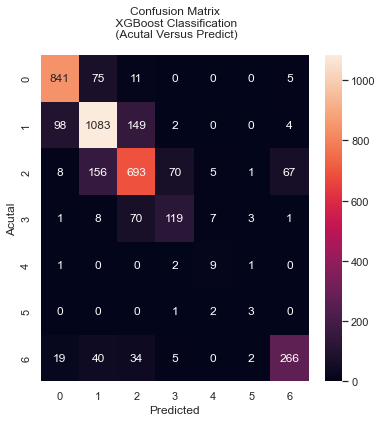

In [27]:
# Creating a new XGBoost Classifier within the OneVsRest Classifier for multiple class classification purpose
xgb = OneVsRestClassifier(XGBClassifier(use_label_encoder=False, eval_metric='error'))
xgb.fit(X_resampled, y_resampled)
y_pred = xgb.predict(X_test)

# Creating of confusion matrix
data = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index=np.unique(y_test))
df_cm.index.name = "Acutal"
df_cm.columns.name = "Predicted"
plt.figure(figsize=(6,6))
plt.title("Confusion Matrix\n XGBoost Classification\n (Acutal Versus Predict)\n")

sns.heatmap(df_cm, annot=True, fmt="d")

### 7b. Classification Report

In [28]:
# Generate Classification Report
print ("\tClassification Report of XGBoost Classification\n")
print(classification_report(y_test, y_pred))

	Classification Report of XGBoost Classification

              precision    recall  f1-score   support

           0       0.87      0.90      0.89       932
           1       0.80      0.81      0.80      1336
           2       0.72      0.69      0.71      1000
           3       0.60      0.57      0.58       209
           4       0.39      0.69      0.50        13
           5       0.30      0.50      0.37         6
           6       0.78      0.73      0.75       366

    accuracy                           0.78      3862
   macro avg       0.64      0.70      0.66      3862
weighted avg       0.78      0.78      0.78      3862



### 7c. ROC curve

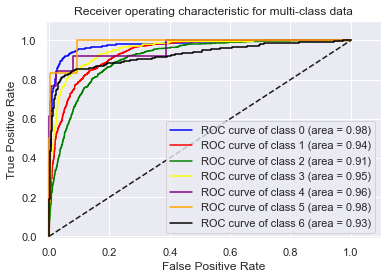

In [29]:
# Creating of a ROC curve for Multiple class
y_score = xgb.fit(X_resampled, y_resampled).predict_proba(X_test)

# y variable need to be reassign for label transformation
y_test_binarize = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6])
n_classes = y_test_binarize.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()

# For loop to store the result of the curve
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarize[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green', 'yellow', 'purple', 'orange', 'black', 'grey'])

# For loop for plotting the lines of the class
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label='ROC curve of class {0} (area = {1:.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.01, 1.1])
plt.ylim([-0.01, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

### 7d. Results Analysis

Based on the illustrations of the confusion matrix, it is possible to see that all classes can be accurate predict in the correct membership in a most instances. However, it is noticable that class 3, 4, 5, and 6 have a rather low samples size compared to class 0, 1, and 2. Closer examination through the use of a classification report suggests that the precision score of each class hold above 0.70 with the exception of class 4 and 5. The result is expected as it was previously seen that samples in classes 3, 4, 5, and 6 does have a significantly lower distribution of samples than 0, 1, and 2. However, despite of the undersampling of the minority classes, the proposed model is accurate in predicting 78% of the time. Therefore, suggesting that the XGBoost is the perfect model for the current dataset. Also, a ROC curve for the multiple class XGBoost Classifier was plotted; however, the plotting was surprising skeptical due to the fitting of the plot. As a result, the only purpose of the ROC curve was to remain as an pictorial comparison as to how wrongful illustration of the model could look like.

## 8. Out-of-sample Prediction

### 8a. Prediction Data Set Up

In [30]:
# Generate random numbers for prediction sample
total_random = random.randint(low=1.000000e+04, high=4.980000e+06, size=(6))
exp_random = random.randint(low=0, high=43, size=(6))
YatC_random = random.randint(low=0, high=21, size=(6))
baseSalary_random = random.randint(low=0, high=500001, size=(6))
stock_random = random.randint(low=0.000000e+00, high=2.800000e+06, size=(6))
bonus_random = random.randint(low=0, high=555001, size=(6))
facebook_random = random.randint(low=0, high=2, size=(6))
google_random = 1-facebook_random


In [31]:
# Creating a Dictionary and matching columns with dataset
predData = {'totalyearlycompensation' : total_random,
           'yearsofexperience' : exp_random,
           'yearsatcompany' : YatC_random,
           'basesalary' : baseSalary_random,
           'stockgrantvalue' : stock_random,
           'bonus' : bonus_random,
           'cityid' : [11527, 4015, 11527, 7419, 4058, 4878],
           'company_Facebook' : facebook_random,
           'company_Google' : google_random}

# Creating a DataFrame
predData_df = pd.DataFrame(predData)
predData_df.columns = select_k_best_features.columns
print(predData_df)

   totalyearlycompensation  yearsofexperience  yearsatcompany  basesalary  \
0                  3210720                 36               3      160831   
1                  4899430                 29              19      288594   
2                   135325                 42               3      112020   
3                  3430263                 29               7      216491   
4                  2010068                 40               0      467078   
5                  1813135                 13              10      347263   

   stockgrantvalue   bonus  cityid  company_Facebook  company_Google  
0           637811  520782   11527                 0               1  
1          2485740  390378    4015                 0               1  
2          1719310  354685   11527                 0               1  
3           541964  541460    7419                 0               1  
4          1945405  406104    4058                 0               1  
5           834934  510782    4878

### 8b. Applying Scaler

In [32]:
# applying the scaler that was created from the model creation
pred_data_rb = rb.transform(predData_df)
pred_data_rb = pd.DataFrame(pred_data_rb, columns=predData_df.columns)
pred_data_rb

# assign predict and predict probability
xgb_y_pred = xgb.predict(pred_data_rb)
xgb_pred_prob_y = xgb.predict_proba(pred_data_rb)

### 8c. Results of Prediction

In [33]:
# Function to display class membership
def display_classLabel(y_pred_):
    label =''
    if y_pred_ == 0:
        label ='L4'
    elif y_pred_ == 1:
        label = 'L5'
    elif y_pred_ == 2:
        label = 'L6'
    elif y_pred_ == 3:
        label = 'L7'
    elif y_pred_ == 4:
        label = 'L8'
    elif y_pred_ == 5:
        label = 'L10'
    else:
        label = '"Other"'
    print('Predicted class membership for client', (i+1), 'is', y_pred_,', which means',label)
    
# Function to display predicted probability
def display_PredProb(y_pred_, pred_prob):
    prob_label = ''
    prob = 0
    if y_pred_== 0:
        prob_label =', which mean the probability of level being L4 is'
        prob = "{:.3f}".format (pred_prob[0])
    elif y_pred_ == 1:
        prob_label =', which mean the probability of level being L5 is'
        prob = "{:.3f}".format (pred_prob[1])
    elif y_pred_ == 2:
        prob_label =', which mean the probability of level being L6 is'
        prob = "{:.3f}".format (pred_prob[2])
    elif y_pred_ == 3:
        prob_label =', which mean the probability of level being L7 is'
        prob = "{:.3f}".format (pred_prob[3])
    elif y_pred_ == 4:
        prob_label =', which mean the probability of level being L8 is'
        prob = "{:.3f}".format (pred_prob[4])
    elif y_pred_ == 5:
        prob_label =', which mean the probability of level being L10 is'
        prob = "{:.3f}".format (pred_prob[5])
    else:
        prob_label =', which means the probability of level would be other is'
        prob = "{:.3f}".format (pred_prob[6])
        
    print('Predicted probability for client', (i+1), 'is', prob, prob_label, prob)
    
# For Loop to display the prediction of the prediction dataframe
for i in range(predData_df.shape[0]):
    display_classLabel(xgb_y_pred[i])
    print('')
    display_PredProb(xgb_y_pred[i], xgb_pred_prob_y[i])
    print('')

Predicted class membership for client 1 is 2 , which means L6

Predicted probability for client 1 is 0.710 , which mean the probability of level being L6 is 0.710

Predicted class membership for client 2 is 2 , which means L6

Predicted probability for client 2 is 0.852 , which mean the probability of level being L6 is 0.852

Predicted class membership for client 3 is 2 , which means L6

Predicted probability for client 3 is 0.628 , which mean the probability of level being L6 is 0.628

Predicted class membership for client 4 is 2 , which means L6

Predicted probability for client 4 is 0.653 , which mean the probability of level being L6 is 0.653

Predicted class membership for client 5 is 2 , which means L6

Predicted probability for client 5 is 0.508 , which mean the probability of level being L6 is 0.508

Predicted class membership for client 6 is 5 , which means L10

Predicted probability for client 6 is 0.710 , which mean the probability of level being L10 is 0.710



### 8d. Discussion of Findings

The results of the prediction dataset suggests that the model is predictive of randomly generated data as it allows for accurate predictions. However, it should also be skeptical and be wary that the machine was not able to sufficiently learn the classes for 3, 4, and 5 due to the lack of sampling; therefore, it may result in misclassification during the process. However, despite of those potential issues, the model's accuracy score and performance with the prediction dataset does suggests that it holds powerful in most instances.